# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Sumber dataset: https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih cantik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from google.colab import drive # Mount Google Drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Untuk normalisasi dan standarisasi
from sklearn.preprocessing import LabelEncoder # Untuk encoding
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memuat dataset ke dalam dataframe
df = pd.read_csv('/content/drive/MyDrive/synthetic_beverage_sales_data.csv')

In [4]:
# Tampilkan 10 baris awal dataset
df.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


# **4. Exploratory Data Analysis (EDA)**


Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# 1. Memahami Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [6]:
# Ambil subset dataset secara acak karena dataset terlalu besar
df = df.sample(n=100000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# 2. Menangani data yang hilang
print("Jumlah data yang hilang per kolom:")
df.isnull().sum()

Jumlah data yang hilang per kolom:


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [8]:
# 3. Analisis Distribusi dan Korelasi

# Tampilkan ringkasan statistik untuk kolom data numerik
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000,100000.000,100000.000,100000.000
mean,5.774,23.237,0.030,132.580
std,14.553,26.930,0.045,524.242
min,0.320,1.000,0.000,0.320
25%,1.050,6.000,0.000,8.400
50%,1.750,11.000,0.000,21.140
75%,3.210,31.000,0.050,70.212
max,159.800,100.000,0.150,12817.750


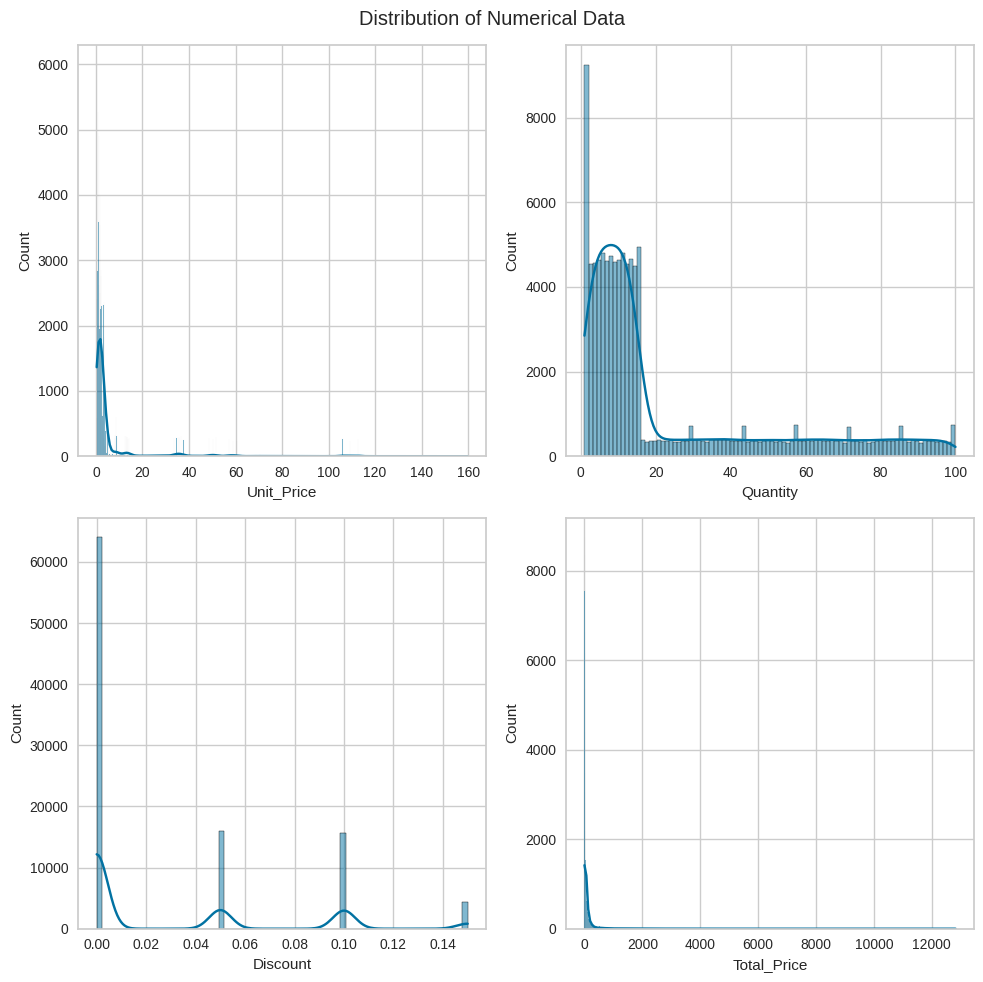

In [9]:
# Ambil nama kolom data numerik dari DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Visualisasikan distribusi data numerik dalam histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
plt.suptitle("Distribution of Numerical Data")
plt.tight_layout()
plt.show()

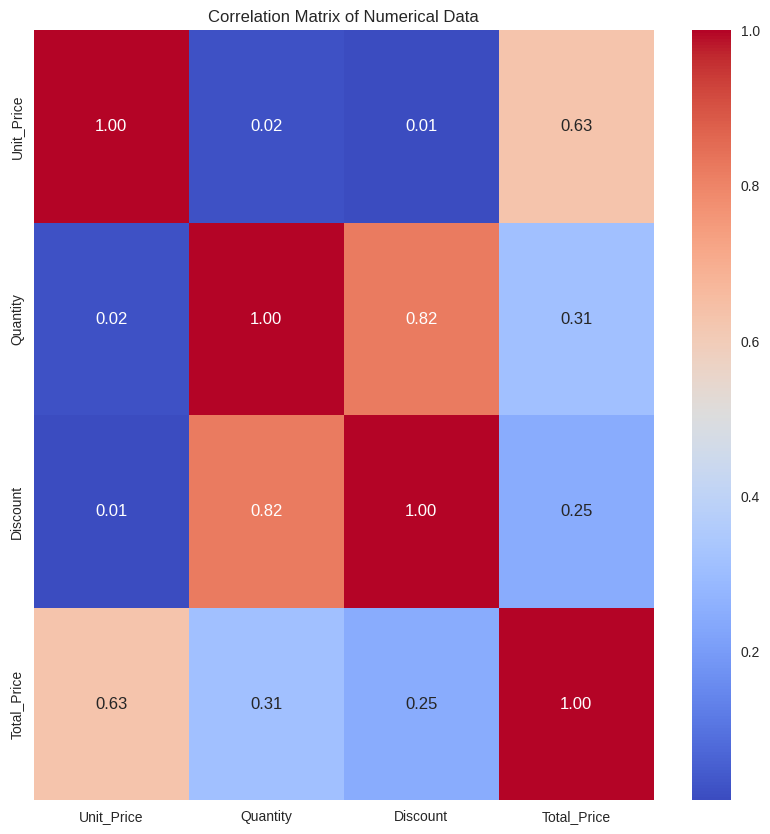

In [10]:
# Periksa hubungan antara variabel dengan matriks korelasi dan visualisasi dengan heatmap pada data numerik
plt.figure(figsize=(10, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

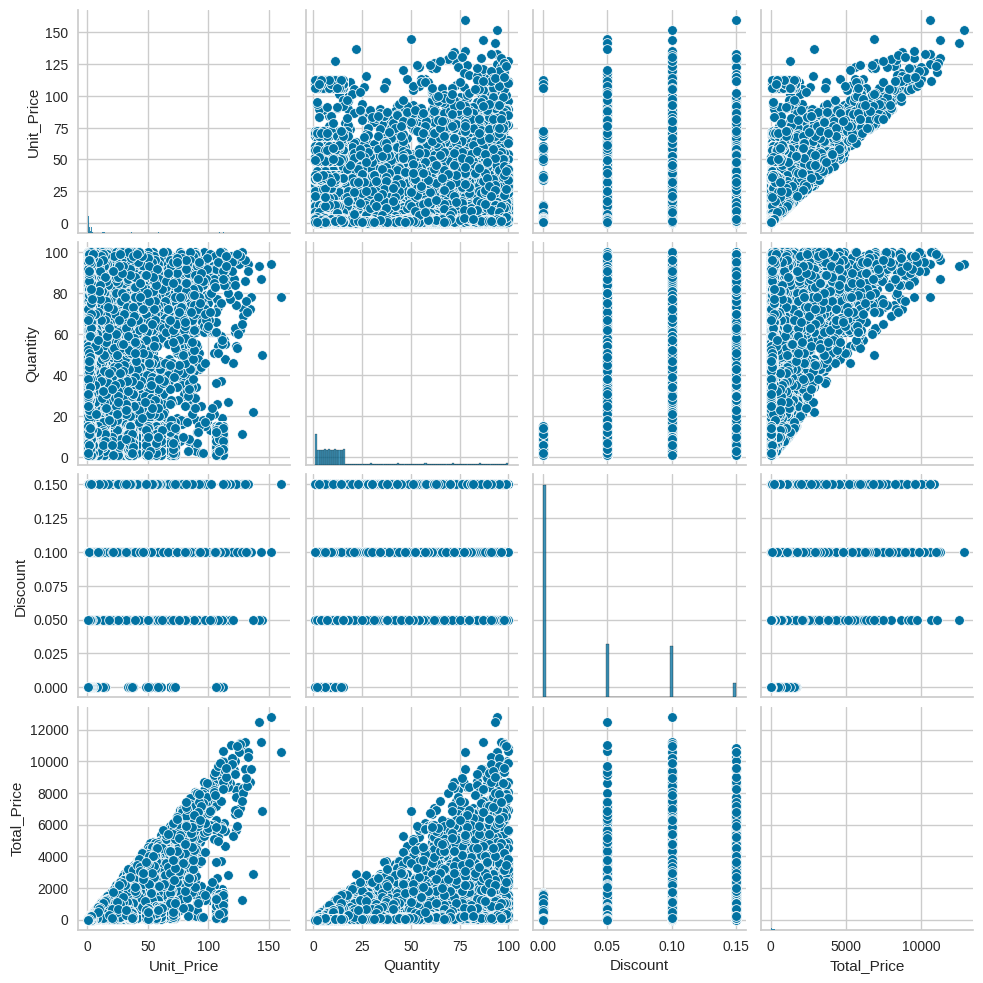

In [11]:
# Periksa hubungan antara variabel dengan pairplot pada data numerik
sns.pairplot(df[numeric_columns])
plt.show()

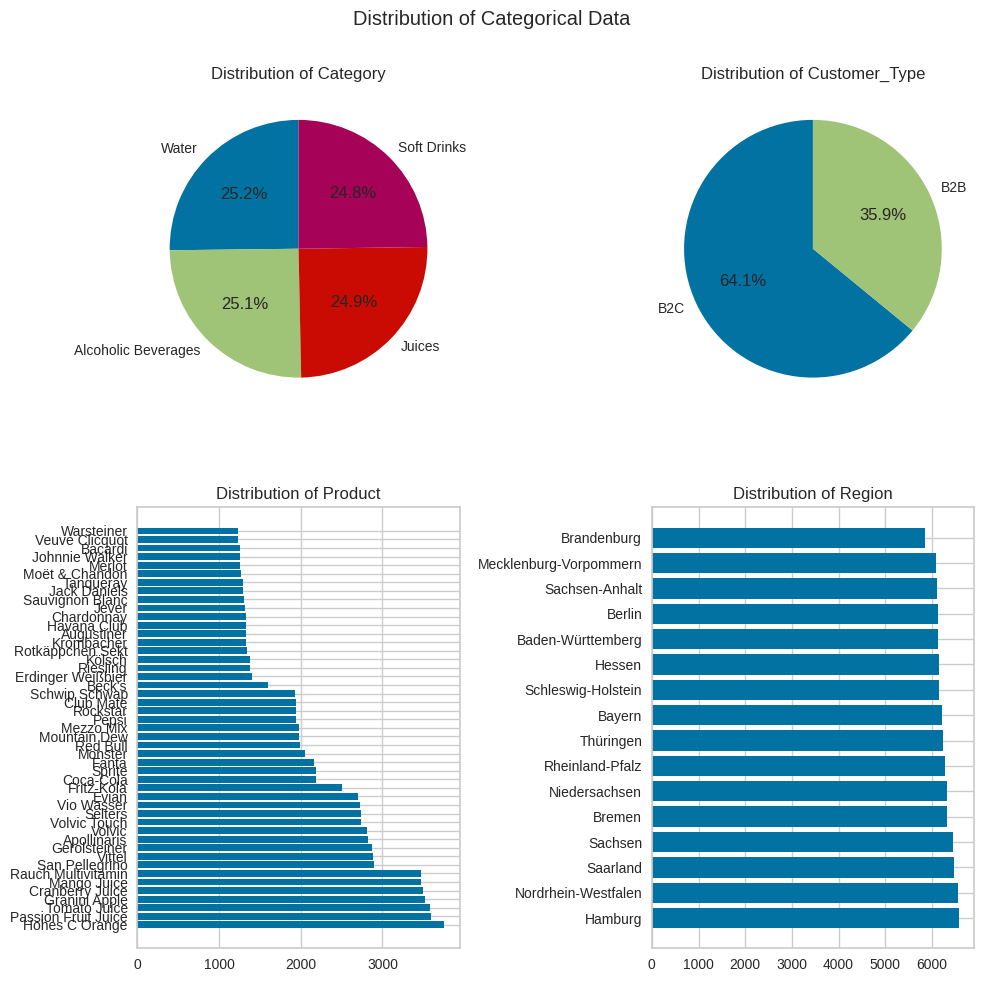

In [12]:
# 4. Visualisasi Data

# Ambil nama kolom data kategorikal
categorical_columns = ['Category','Customer_Type','Product','Region']

# Visualisasikan distribusi data kategorikal
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Diagram distribusi Category
category_count = df['Category'].value_counts()
axes[0,0].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Category')

# Diagram distribusi Customer_Type
customer_type_count = df['Customer_Type'].value_counts()
axes[0,1].pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Customer_Type')

# Diagram distribusi Customer_Type
product_count = df['Product'].value_counts()
axes[1,0].barh(product_count.index, product_count.values)
axes[1,0].set_title('Distribution of Product')

# Diagram distribusi Region
region_count = df['Region'].value_counts()
axes[1,1].barh(region_count.index, region_count.values)
axes[1,1].set_title('Distribution of Region')

plt.tight_layout()
plt.suptitle("Distribution of Categorical Data")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 5.1. Menghapus atau Menangani Data Kosong (Missing Values)

In [13]:
# Cek data kosong
print("Jumlah data kosong per kolom:")
df.isnull().sum()

Jumlah data kosong per kolom:


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


## 5.2. Menghapus Data Duplikat

In [14]:
# Cek data duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


## 5.3. Normalisasi atau Standarisasi Fitur

In [15]:
# Inisialisasi fungsi normalisasi dan standarisasi
min_max_scaler = MinMaxScaler() # normalisasi
standard_scaler = StandardScaler() # standarisasi

In [16]:
# Normalisasi data
df_normalized = df.copy()
df_normalized[['Quantity']] = min_max_scaler.fit_transform(df_normalized[['Quantity']])
df_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [17]:
# Standarisasi data
df_standardized = df_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.197455,0.727273,0.05,0.130723,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28


## 5.4. Deteksi dan Penanganan Outlier

In [18]:
# Menghitung Q1, Q3, dan IQR hanya untuk kolom numerik
Q1 = df_standardized[numeric_columns].quantile(0.25)
Q3 = df_standardized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

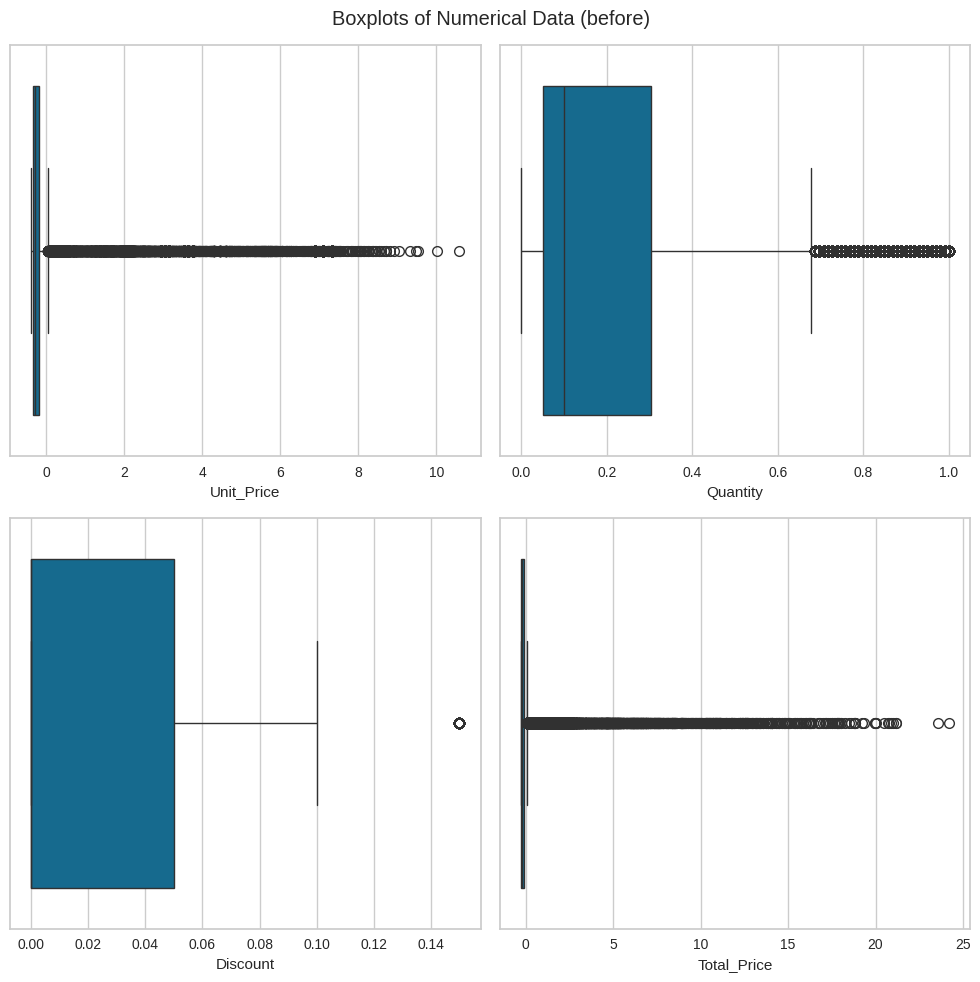

Jumlah data sebelum menghapus outlier: 100000


In [19]:
# Menampilkan boxplot sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_standardized[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (before)")
plt.tight_layout()
plt.show()

print("Jumlah data sebelum menghapus outlier:", df_standardized.shape[0])

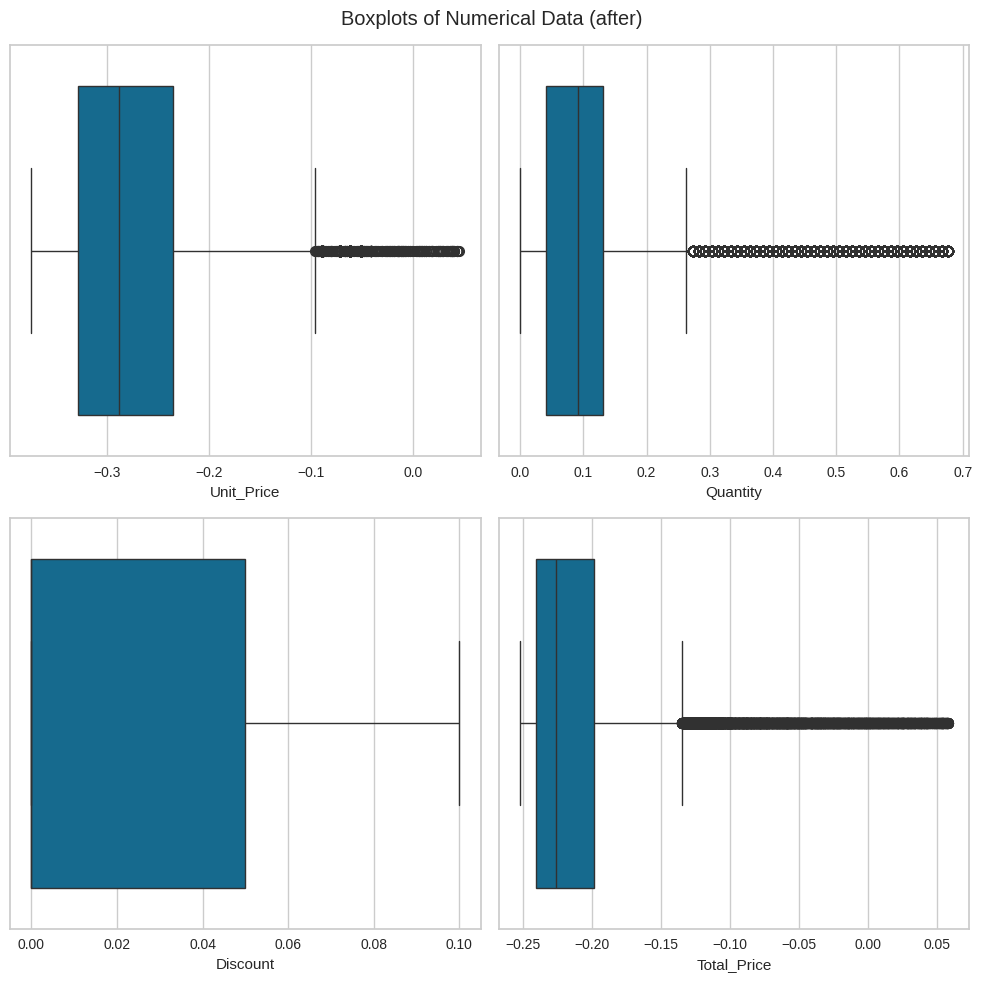

Jumlah data setelah menghapus outlier: 75948


In [20]:
# Menghapus outlier pada kolom numerik
mask = ~((df_standardized[numeric_columns] < lower_bound) | (df_standardized[numeric_columns] > upper_bound)).any(axis=1)
df_cleaned = df_standardized[mask]

# Menampilkan boxplot sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (after)")
plt.tight_layout()
plt.show()

print("Jumlah data setelah menghapus outlier:", df_cleaned.shape[0])

## 5.5. Encoding Data Kategorikal

In [21]:
# Inisialisasi label encoder
label_encoder = LabelEncoder()

df_labeled = df_cleaned.copy()

# Label encoding
df_labeled[['Category', 'Region', 'Product']] = df_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)

# one-hot encoding
df_encoded = pd.get_dummies(df_labeled, columns=['Customer_Type'])
df_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,False,True
1,ORD1118443,CUS7797,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,True,False
3,ORD1437128,CUS6393,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,True,False
4,ORD562794,CUS4090,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,False,True
5,ORD2320519,CUS5936,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
# Tentukan fitur
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']
X = df_encoded[features]
X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
0,-0.325266,0.060606,0.00,-0.239013,False,True
1,-0.347942,0.454545,0.10,-0.196837,True,False
3,-0.212572,0.292929,0.05,-0.107203,True,False
4,-0.334199,0.020202,0.00,-0.247692,False,True
5,-0.299841,0.030303,0.00,-0.242141,False,True
...,...,...,...,...,...,...
99992,-0.241433,0.131313,0.00,-0.192545,False,True
99993,-0.287472,0.050505,0.00,-0.234702,False,True
99995,-0.317020,0.050505,0.00,-0.239623,False,True
99997,-0.353439,0.000000,0.00,-0.251698,False,True


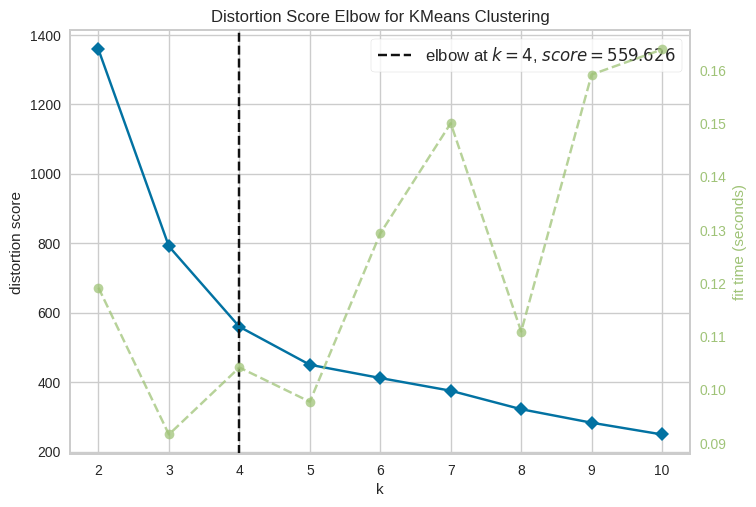

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [24]:
# Kurangi dimensi data menjadi 2 dengan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [25]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [26]:
# Hitung Silhouette Score
sil_score = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score for K={optimal_k}: {sil_score}')

Silhouette Score for K=4: 0.865686355985184


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [27]:
# Dilewati karena Silhouette Score sudah >= 80

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

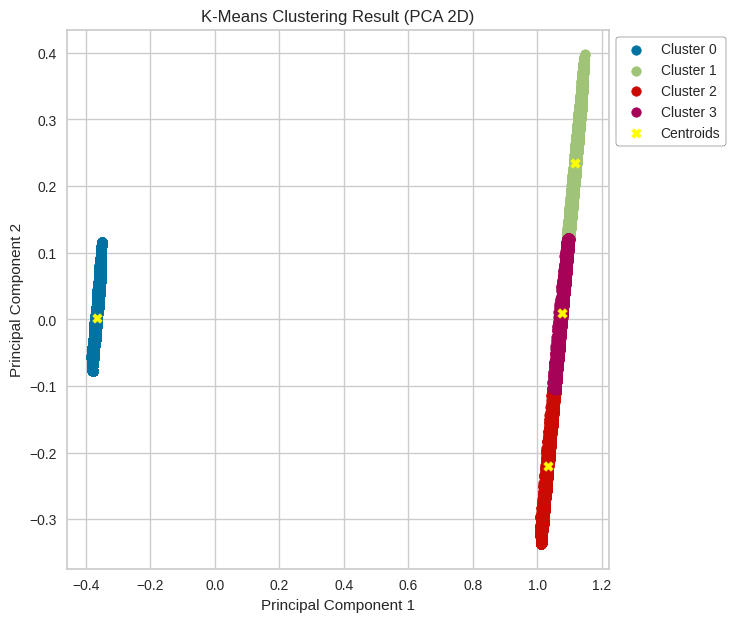

In [28]:
# Visualize each cluster
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [29]:
# Tambahkan hasil clustering pada data setelah penanganan outlier
df_labeled = df_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.299841,0.030303,0.00,-0.242141,Bremen,2023-11-01,0


In [30]:
# Ubah kembali data numerik menjadi semula (sebelum dinormalisasi/standardisasi)
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


Cluster
0    56636
2     6877
3     6604
1     5831
Name: count, dtype: int64 



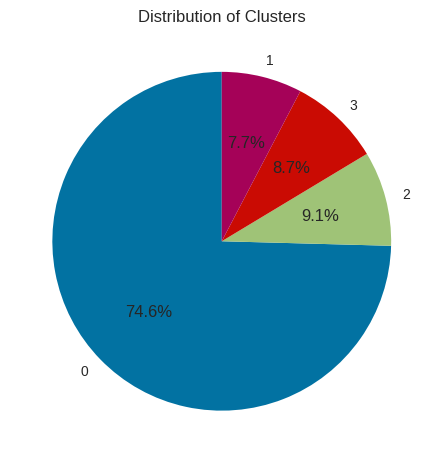

In [31]:
# Hitung jumlah data per kluster
cluster_count = df_labeled['Cluster'].value_counts()
print(cluster_count,'\n')

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

In [32]:
# Cari rata-rata setiap cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.844884,7.988188,0.000000,14.748905
1,1.625586,55.823701,0.078760,82.099283
2,1.532740,11.820125,0.059721,16.249724
3,1.608660,33.914749,0.066626,49.194571


Customer_Type   B2B    B2C
Cluster                   
0                 0  56636
1              5831      0
2              6877      0
3              6604      0 



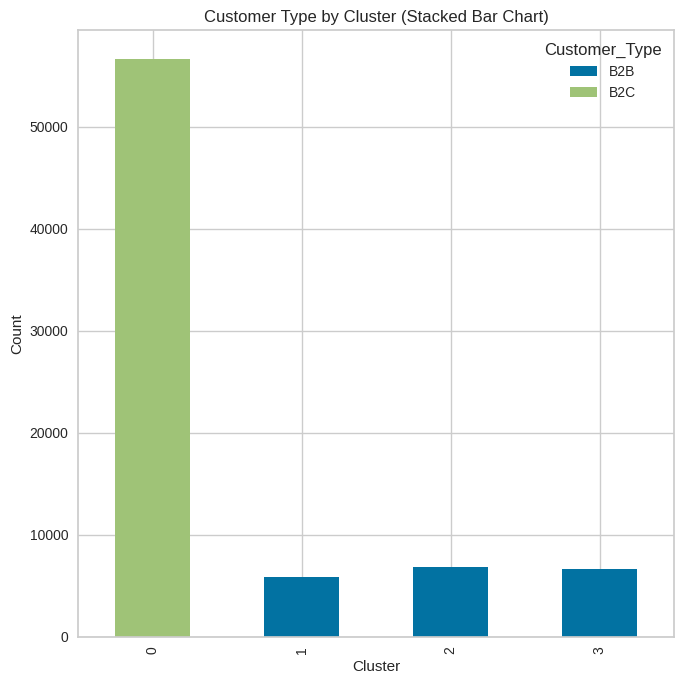

In [33]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' dan hitung kemunculan datanya
customer_type_and_cluster_counts = df_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_and_cluster_counts,'\n')

# Plot dengan bar chart
customer_type_and_cluster_counts.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Analisis Karakteristik Cluster**

Berikut adalah analisis karakteristik untuk setiap cluster.

- **Cluster 0**:

  - **Rata-Rata Harga Per Unit (Unit Price): 1,84**
  - **Rata-Rata Jumlah Pembelian (Quantity): 7,99 unit**
  - **Rata-Rata Diskon (Discount): 0% (Tidak ada diskon)**
  - **Rata-Rata Harga Total (Total Price): 14,75**
  - **Jenis Pelanggan (Customer Type): B2C (Business to Consumer).**
  - Analisis: Cluster ini mencakup pelanggan yang membeli dalam jumlah kecil dan tanpa mendapat diskon sehingga harga per unit menjadi relatif lebih tinggi. Cluster ini menunjukkan bahwa mereka mungkin adalah pelanggan *end-user* atau pemakai produk yang cenderung membeli produk untuk kebutuhan pribadi.

- **Cluster 1**:

  - **Rata-Rata Harga Per Unit (Unit Price): 1,63**
  - **Rata-Rata Jumlah Pembelian (Quantity): 55,82 unit**
  - **Rata-Rata Diskon (Discount): 7,88%**
  - **Rata-Rata Harga Total (Total Price): 82,10**
  - **Jenis Pelanggan (Customer Type): B2B (Business to Business).**
  - Analisis: Cluster ini menunjukkan pelanggan B2B yang membeli dalam jumlah besar dan mendapat diskon besar sehingga harga per unit mereka lebih rendah. Dengan total harga yang cukup tinggi, ini menunjukkan pelanggan B2B yang membeli dalam volume besar untuk keperluan bisnis, di mana diskon menjadi faktor penting untuk memaksimalkan margin keuntungan.

- **Cluster 2**:

  - **Rata-Rata Harga Per Unit (Unit Price): 1,53**
  - **Rata-Rata Jumlah Pembelian (Quantity): 11,82 unit**
  - **Rata-Rata Diskon (Discount): 5,97%**
  - **Rata-Rata Harga Total (Total Price): 16,25**
  - **Jenis Pelanggan (Customer Type): B2B (Business to Business).**
  - Analisis: Cluster ini menunjukkan pelanggan B2B yang membeli dalam jumlah kecil dengan diskon kecil juga. Harga unit mereka juga lebih rendah dibandingkan dengan Cluster 0, yang mungkin menunjukkan bahwa mereka lebih sensitif terhadap harga dan cenderung memanfaatkan diskon yang tersedia. Mereka mungkin terdiri dari bisnis kecil atau individu yang membeli dalam jumlah lebih banyak daripada konsumen rata-rata.

- **Cluster 3**:

  - **Rata-Rata Harga Per Unit (Unit Price): 1,61**
  - **Rata-Rata Jumlah Pembelian (Quantity): 33,91 unit**
  - **Rata-Rata Diskon (Discount): 6,66%**
  - **Rata-Rata Harga Total (Total Price): 49,19**
  - **Jenis Pelanggan (Customer Type): B2B (Business to Business).**
  - Analisis: Cluster ini mencakup pelanggan B2B dengan pembelian dalam volume moderat dan mendapat diskon moderat, yang menunjukkan bahwa mereka memanfaatkan potongan harga dalam pembelian yang lebih besar. Harga unit mereka sedikit lebih rendah dibandingkan dengan Cluster 1, yang mungkin menunjukkan mereka mungkin terdiri dari bisnis menengah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Simpan dataframe ke dalam file CSV
df_labeled.to_csv('beverage-sales_clustered.csv', index=False)